<a href="https://colab.research.google.com/github/adam2390/umwf/blob/main/UM_fin_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px

In [ ]:
from datetime import datetime

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 21.8 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 2.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=d7438a789900ee43bcf7c3fecce6c76a54f8faf126cdccc7aa1b01ffc54f808a
  Stored in directory: /tmp/pip-ephem-wheel-cache-irgjhr4d/wheels/43/c8/f4/c0ebc32d7f20fe89d0e92d90eaeef5f0c0594a89b6bc16b352
Successfully built ydata-profiling
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninsta

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
#url = 'https://github.com/adam2390/umwf/blob/main/wig_budow_w.csv'
url = 'https://raw.githubusercontent.com/adam2390/umwf/master/wig_budow_w.csv'
url2 = 'https://raw.githubusercontent.com/adam2390/umwf/master/wig_banki_wig_paliwa.csv'
df_raw = pd.read_csv(url)
df_raw2 = pd.read_csv(url2)

In [ ]:
df_raw.columns

Index(['Unnamed: 0', 'Date', 'W_BUD_Close', 'W_Close', 'LW_BUD_Close',
       'DLW_BUD_Close', 'LW_Close', 'DLW_Close', 'NBP_stopy',
       'LAG_DLW_BUD_Close_1', 'LAG_DLW_Close_1', '2DLW_BUD_Closer',
       '2DLW_Close', 'WIG_NCHROM', 'LWIG_NCHROM', 'DLWIG_NCHROM',
       'DNBP_stopy'],
      dtype='object')

In [ ]:
df = df_raw[['Date','W_Close', 'W_BUD_Close', 'WIG_NCHROM']]
df['Date'] = pd.to_datetime(df['Date'])
df.head()

<ipython-input-27-558abe86abd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


Date  W_Close  W_BUD_Close  WIG_NCHROM
0 2007-01-07  49560.3      7793.67     4956.03
1 2007-01-14  51020.9      8092.16     5102.09
2 2007-01-21  54048.2      8760.36     5404.82
3 2007-01-28  53488.0      9394.62     5348.80
4 2007-02-04  55314.0      9738.73     5531.40

In [ ]:
df2 = df_raw2[['Date','WIG_BANKI_Close','WIG_PALIWA_Close']]
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'].dtype

# df2.head()

<ipython-input-28-8ae335221f8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'])


dtype('<M8[ns]')

In [ ]:
df = pd.merge(df, df2, on='Date')
df.head()

Date  W_Close  W_BUD_Close  WIG_NCHROM  WIG_BANKI_Close  \
0 2007-01-07  49560.3      7793.67     4956.03          7080.57   
1 2007-01-14  51020.9      8092.16     5102.09          7128.55   
2 2007-01-21  54048.2      8760.36     5404.82          7740.64   
3 2007-01-28  53488.0      9394.62     5348.80          7514.48   
4 2007-02-04  55314.0      9738.73     5531.40          7960.57   

   WIG_PALIWA_Close  
0           3102.80  
1           3085.47  
2           3091.59  
3           3072.63  
4           3147.76

In [ ]:
df.rename(columns={'W_Close': 'WIG','W_BUD_Close':'WIG_BUDOW','WIG_BANKI_Close':'WIG_BANKI','WIG_PALIWA_Close':'WIG_PALIWA'},inplace=True)
#df = df.set_index('Date') #nwm czy potrzebne
df.head()

Date      WIG  WIG_BUDOW  WIG_NCHROM  WIG_BANKI  WIG_PALIWA
0 2007-01-07  49560.3    7793.67     4956.03    7080.57     3102.80
1 2007-01-14  51020.9    8092.16     5102.09    7128.55     3085.47
2 2007-01-21  54048.2    8760.36     5404.82    7740.64     3091.59
3 2007-01-28  53488.0    9394.62     5348.80    7514.48     3072.63
4 2007-02-04  55314.0    9738.73     5531.40    7960.57     3147.76

In [ ]:
df_nbp = df_raw[['Date', 'NBP_stopy']]
df_nbp.head()

Date  NBP_stopy
0  2007-01-07        4.0
1  2007-01-14        4.0
2  2007-01-21        4.0
3  2007-01-28        4.0
4  2007-02-04        4.0

In [ ]:
df[['WIG','WIG_BUDOW','WIG_NCHROM','WIG_BANKI','WIG_PALIWA']].describe().transpose()

count          mean          std       min       25%       50%  \
WIG         833.0  50715.256146  9754.996945  21690.80  44732.92  51020.90   
WIG_BUDOW   833.0   3808.122173  2208.495385   1370.28   2252.86   2932.24   
WIG_NCHROM  833.0   2293.792257  1057.695767   1024.30   1478.98   2122.08   
WIG_BANKI   833.0   6617.217731  1363.741129   2533.36   5836.48   6704.78   
WIG_PALIWA  833.0   4435.644502  1769.040353   1607.27   2982.43   3828.80   

                 75%       max  
WIG         57877.81  74813.24  
WIG_BUDOW    4502.41  12256.70  
WIG_NCHROM   2620.58   6543.82  
WIG_BANKI    7670.09   9524.06  
WIG_PALIWA   6062.53   8541.08

In [ ]:
report = ProfileReport(df[['WIG',	'WIG_BUDOW',	'WIG_NCHROM','WIG_BANKI','WIG_PALIWA']])
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def time_series(y):
  sns.set_style('darkgrid')
  sns.set(rc={'figure.figsize':(14,8)})

  ax = sns.lineplot(data=df, x = 'Date', y = y,
                    legend='auto', lw=3)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(92))
  plt.ylabel('Cena zamknięcia')
  plt.xlabel('Data')
  plt.show()

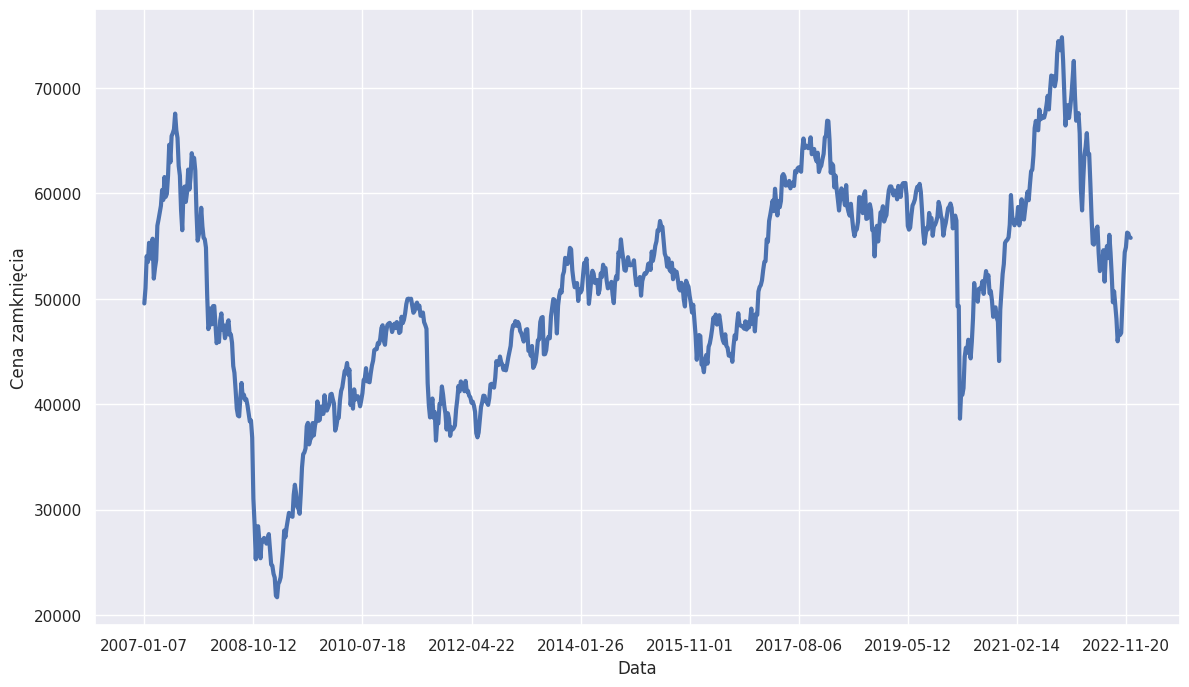

In [ ]:
time_series('WIG')

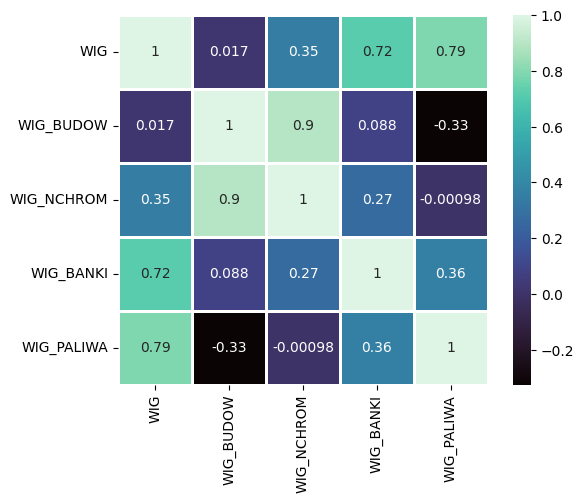

In [ ]:
#Korelacja pomiędzy indeksami
df_corr = df[['WIG',	'WIG_BUDOW',	'WIG_NCHROM','WIG_BANKI','WIG_PALIWA']].corr(method = "pearson")  
sns.heatmap(data = df_corr, annot = True, linewidth = 1, linecolor = 'w', square = True, cmap = 'mako')
plt.show()

In [ ]:
def boxplot(y):
  fig = px.box(df, y = y, width=600, height=400)
  fig.show()

In [ ]:
boxplot('WIG')

In [ ]:
def find_outliers(column):
  
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  IQR=q3-q1
  outliers = df[column][((df[column]<(q1-1.5*IQR)) | (df[column]>(q3+1.5*IQR)))]
  print('Liczba outlierów: '+ str(len(outliers)))
  print('Największa wartość outliera: '+ str(outliers.max()))
  print('Najmniejsza wartość outliera: '+ str(outliers.min()))
  return outliers

In [ ]:
find_outliers('WIG')

Liczba outlierów: 10
Największa wartość outliera: 24813.0
Najmniejsza wartość outliera: 21690.8


107    24798.0
108    24685.4
109    23914.4
110    23555.5
111    21831.6
112    21690.8
113    22948.5
114    23176.7
115    23581.9
116    24813.0
Name: WIG, dtype: float64